Feature ranking (most important):
1. section_names_header (0.013411)
2. ent_q_diffs_var (0.011097)
3. ent_p_8 (0.008002)
4. ent_q_diff_diffs_2_min (0.007035)
5. Img4 (0.006078)


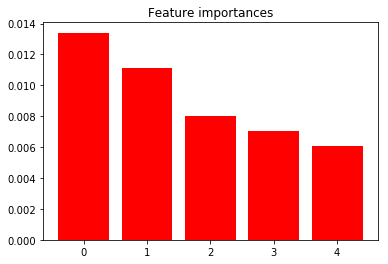

Feature ranking (least important):
1. *invalid* (0.0)
2. __vbaRecUniToAnsi (0.0)
3. misc_market (0.0)
4. PCCTL_CONTEXT (0.0)
5. GetFileTitleA (0.0)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Read data
data = pd.read_csv("LargeTrain.csv")

X = np.array(data.ix[:,0:1804])
y = np.array(data.ix[:,1804:1805]).ravel()

# Calculate feature importances
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest = forest.fit(X,y)

featureNames = data.columns
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

indices = np.argsort(importances)[::-1]

# Print (most important)
plotNum = 5
print("Feature ranking (most important):")
for i in range(plotNum):
    print("{0}. {1} ({2})".format(i + 1, featureNames[indices[i]], round(importances[indices[i]], 6)))

# Plot
plt.figure()
plt.title("Feature importances")
plt.bar(range(plotNum), importances[indices[0:plotNum]], color="r", align="center")
plt.show()
    
# Print (least important)
print("Feature ranking (least important):")
indices = indices[::-1]
for i in range(plotNum):
    print("{0}. {1} ({2})".format(i + 1, featureNames[indices[i]], round(importances[indices[i]], 6)))